## The data set is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
## The goal is to develop Machine Learning Models to present a complete analysis for online shopping behavior data set.

## Description of data set:
### The data set is "online_shoppers_intention.csv". This data set represents skewed data, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
```
a. The dataset consists of 10 numerical and 8 categorical attributes.
b. The 'Revenue' attribute can be used as the class label.
c. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
d. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
e. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
f. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
g. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page and it represents the percentage that the page was seen in the last session. 
h. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
i. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
j. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
```

In [2]:
## Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#!pwd
## Change to working directory
#import os
#os.chdir('/content/drive/MyDrive/ColabNbs/personal_project/')

In [3]:
#Load the libraries
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df = pd.read_csv("data/online_shoppers_intention.csv")
print(f'data has size = {df.shape}')
df.head()

data has size = (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
#Check missing data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Checking the type of data
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
df[['SpecialDay','Weekend','Revenue']] = df[['SpecialDay','Weekend','Revenue']].astype(int)

#Select non numerical value
non_numeric_columns = df.select_dtypes(include=[np.object])
# Loop through the non-numeric columns
for col in range(non_numeric_columns.shape[1]):
    # Print the counts of each unique value in the current column
    print(non_numeric_columns.iloc[:,col].value_counts())

df.dtypes

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int32
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
Revenue                      int32
dtype: object

In [9]:
#Check missing data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# Checking the type of data
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int32
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
Revenue                      int32
dtype: object

In [11]:
df[['SpecialDay','Weekend','Revenue']] = df[['SpecialDay','Weekend','Revenue']].astype(int)

#Select non numerical value
non_numeric_columns = df.select_dtypes(include=[np.object])
# Loop through the non-numeric columns
for col in range(non_numeric_columns.shape[1]):
    # Print the counts of each unique value in the current column
    print(non_numeric_columns.iloc[:,col].value_counts())

df.dtypes

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                   int32
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int32
Revenue                      int32
dtype: object

### 1. Build a predictive classification model (ensuring optimal features and classifier). Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March.

We are going to fit a best Linear and non-linear classifier and explain the optimal features set and dimensions. Linear classifier aids explanaibility while non-linear classifier may enhance classification performance.

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### We will perform one-hot encoded for categorical data and list the categorical features. 

In [13]:
# Do one-hot encoded for categorical data
# List the categorical features. 
categorical_columns = ['SpecialDay','OperatingSystems','Browser','TrafficType', 'VisitorType']
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
ohe = pd.get_dummies(df[categorical_columns].astype(str))
ohe.head()

,SpecialDay_0,SpecialDay_1,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [14]:
df_tsk1 = df.drop(categorical_columns, axis=1) 
df_tsk1 = pd.concat([df_tsk1, ohe], axis=1)
df_tsk1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,Feb,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,Feb,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,Feb,...,0,1,0,0,0,0,0,0,0,1


### Split train and test data

In [15]:
# for train data
options = ['June','Jul','Aug','Sep','Oct','Nov','Dec']  
# selecting rows based on condition
X_train = df_tsk1[df_tsk1['Month'].isin(options)]
y_train = X_train['Revenue']
X_train = X_train.drop(['Month','Region'], axis=1) 

# for test data
options = ['Feb','Mar']  
# selecting rows based on condition
X_test = df_tsk1[df_tsk1['Month'].isin(options)]
X_test = X_test.drop(['Month','Region'], axis=1) 
y_test = X_test['Revenue']

In [16]:
# Compute the fraction of positive values in the train and target
print(f'Percentage of purchases in training = {(np.sum(y_train)*100)/len(y_train)}') 
print(f'Percentage of purchases in test = {(np.sum(y_test)*100)/len(y_test)}')
print(f'The training data currently has {X_train.shape[1]} features')

Percentage of purchases in training = 19.607272727272726
Percentage of purchases in test = 9.32568149210904
The training data currently has 57 features


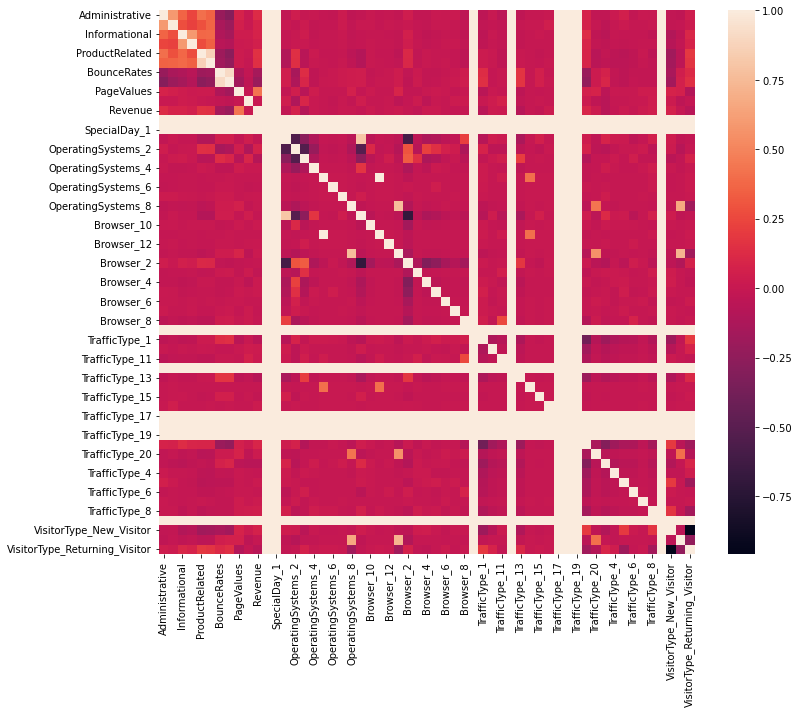

(57, 57)


In [17]:
#Visual inspection of features
plt.figure(figsize=(12,10))
# Compute the Pearson Correlation of each feature in the training df
cor = X_train.corr()
# Replace nan with 1 as it will be removed
cor = cor.fillna(1)
# Plot the correlations
sns.heatmap(cor)
plt.show()
print(cor.shape)

### We will drop feature with high correlation (>=0.8). Correlated features in general don't improve models

In [18]:
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = [True]*len(X_train.columns)
# Loop over all columns
for i in range(len(X_train.columns)-1):
    # Loop over all columns to the right of the current one
    for j in range(i+1,len(X_train.columns)):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8...
        if abs(cor.iloc[i,j]) >= 0.8:       
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j] is True:
                # Drop column j
                keep_columns[j] = False
# Extract the columns to keep from the training df
print(len(keep_columns))
selected_columns = X_train.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
X_out = X_train[selected_columns]

print('The following columns are present in the new data:')
print(selected_columns)
print(f'The old data had {X_train.shape[1]} features. The new df has {X_out.shape[1]} features.')
print(y_train.shape)
X_out.head()

57
The following columns are present in the new data:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Weekend', 'Revenue'],
      dtype='object')
The old data had 57 features. The new df has 9 features.
(6875,)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,Revenue
5455,0,0.000000,0,0.0,1,0.0,0.000000,0,0
5456,3,40.200000,0,0.0,11,0.0,0.000000,0,0
5457,1,63.400000,0,0.0,3,0.0,42.293068,0,1
5458,6,618.066667,0,0.0,50,0.0,28.068050,0,1
5459,0,0.000000,0,0.0,2,0.0,0.000000,0,0


### Another method is using backward elimination with 5% p-value significant level selection.

In [19]:
selected_columns_fnl = selected_columns
selected_columns = selected_columns[0:]
import statsmodels.api as sm

def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        #maxVar = max(regressor_OLS.pvalues).astype(float)
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
# Note that we're passing in df_out, not df_train
data_modeled, selected_columns_fnl = backwardElimination(X_out.values, y_train, SL, selected_columns)

In [20]:
print('The following columns remain based on p-value selection:')
print(selected_columns_fnl)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns_fnl)
print(f'After selection by Pearson Correlation, we had {X_out.shape[1]} features.')
print(f'After selection by p-value, we have {data_red.shape[1]} features.')

The following columns remain based on p-value selection:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Weekend', 'Revenue'],
      dtype='object')
After selection by Pearson Correlation, we had 9 features.
After selection by p-value, we have 9 features.


### Result: It looks like both method gives the same features selection which is 9 

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

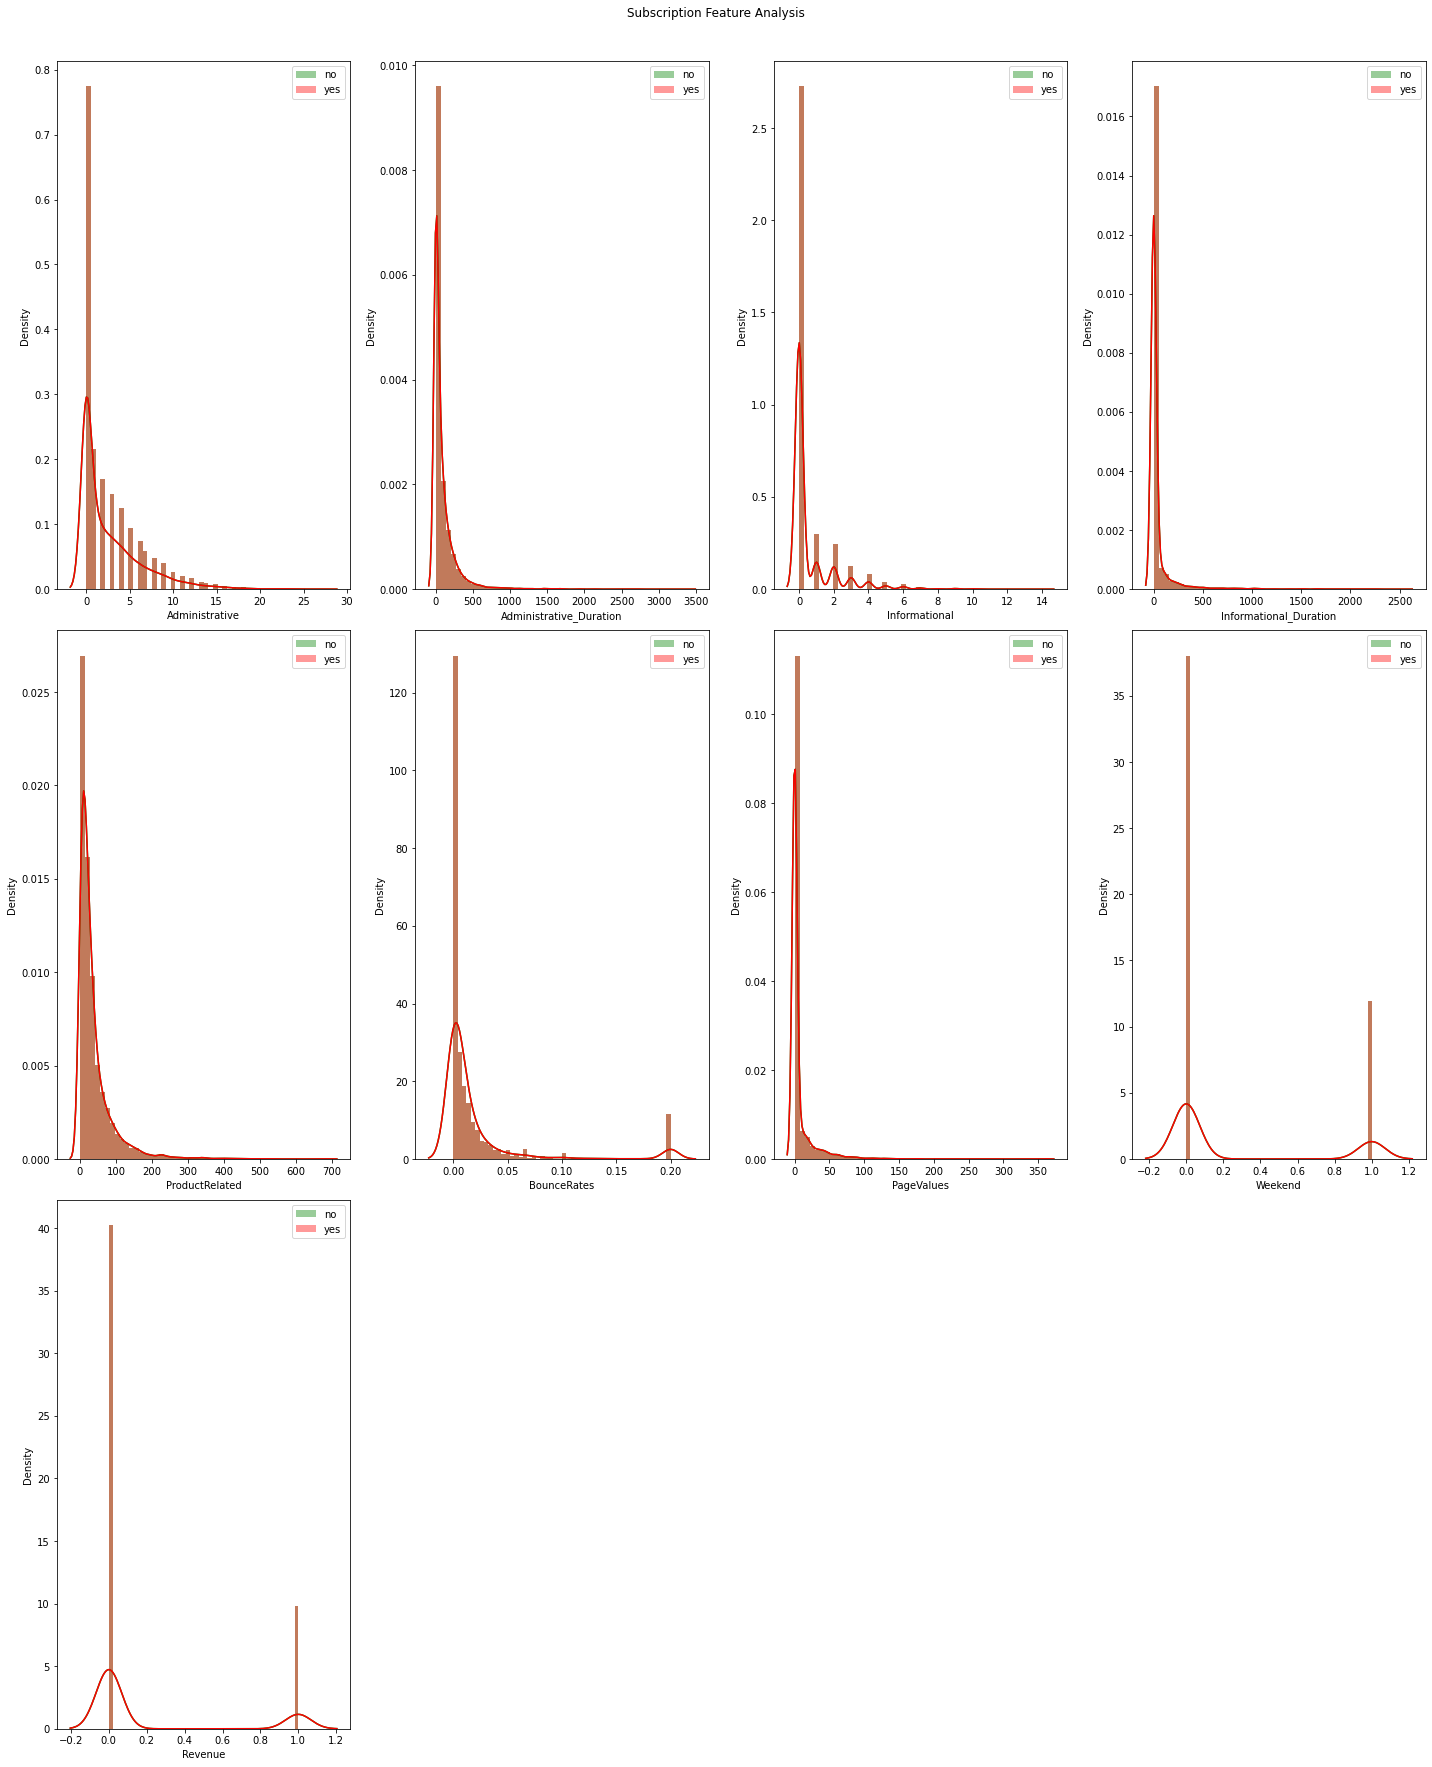

In [21]:
#Visualize the selected features
fig = plt.figure(figsize = (20, 25))
j = 0
for i in X_out.columns:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.distplot(X_out[i], color='g', label = 'no')
    sns.distplot(X_out[i], color='r', label = 'yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [22]:
# Drop the Revenue and do the normalization
from sklearn.preprocessing import normalize

#print(X_train.columns)
X_train = X_train[selected_columns_fnl]
X_train = X_train.drop(['Revenue'], axis=1)
X_train = normalize(X_train)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = X_test[selected_columns_fnl]
X_test = X_test.drop(['Revenue'], axis=1)
X_test = normalize(X_test)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)

(6875, 8)
(2091, 8)


### Get feature ranks/importances for each feature using Random Forest

Feature ranking:
1. feature 6 (0.348002)
feature PageValues
2. feature 4 (0.141237)
feature ProductRelated
3. feature 1 (0.124686)
feature Administrative_Duration
4. feature 5 (0.121360)
feature BounceRates
5. feature 0 (0.105785)
feature Administrative
6. feature 7 (0.060099)
feature Weekend
7. feature 3 (0.050184)
feature Informational_Duration
8. feature 2 (0.048648)
feature Informational


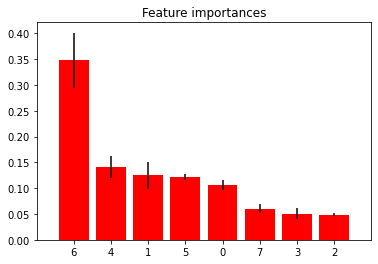

In [23]:
#Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print('feature ' +  selected_columns_fnl[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [24]:
# This function visualizes the classification output on scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
def visualize_scatter_plot(X, y, yhat, title):
    loc11=np.where((y>0) & (yhat>0),1,0) #TP
    loc00=np.where((y==0) & (yhat==0),1,0) #TN
    loc10=np.where((y>0) & (yhat==0),1,0) #FN
    loc01=np.where((y==0) & (yhat>0),1,0) #FP
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(X[np.where(loc00>0),6],X[np.where(loc00>0),4],X[np.where(loc00>0),1],color='blue', marker='o')
    ax.scatter3D(X[np.where(loc10>0),6],X[np.where(loc10>0),4],X[np.where(loc10>0),1],color='cyan', marker='o')
    ax.scatter3D(X[np.where(loc11>0),6],X[np.where(loc11>0),4],X[np.where(loc11>0),1],color='red', marker='^')
    ax.scatter3D(X[np.where(loc01>0),6],X[np.where(loc01>0),4],X[np.where(loc01>0),1],color='green', marker='^')
    ax.set_xlabel('PageValues')
    ax.set_ylabel('ProductRelated')
    ax.set_zlabel('Administrative_Duration')
    plt.title(title)
    plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

# Grid Search with Linear Support Vector Classifier

#### a. We will use linear SVC model with a set paramters as initial prediction

(2091,)
(2091,)
Accuracy = 0.9043519846963175, Precision = 0.49299719887955185, Recall = 0.9025641025641026, F1-score = 0.6376811594202899
Confusion Matrix is:
[[1715  181]
 [  19  176]]


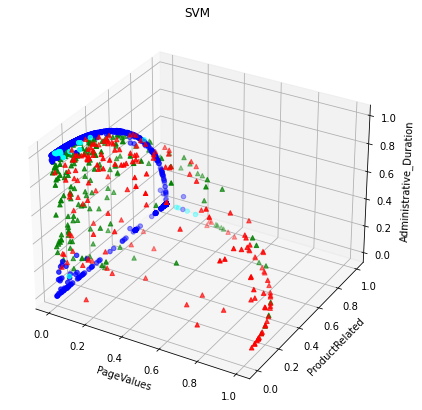

In [26]:
svmb = LinearSVC(class_weight='balanced', random_state=42).fit(X_train, y_train)
svm_predb = svmb.predict(X_test)
print(svm_predb.shape)
print(y_test.shape)

# metrics
cmlog = confusion_matrix(y_test,svm_predb)
acc   = accuracy(y_test,svm_predb)
rec   = recall(y_test,svm_predb)
prec  = precision(y_test,svm_predb)
f1    = f1_score(y_test,svm_predb)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
visualize_scatter_plot(X_test,y_test,svm_predb,'SVM')

### b. We will use GridSearch to optimaze the parameters in linear SVC model

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {"C":[0.1, 1, 10, 100], "tol":[0.01, 1e-3, 1e-4, 1e-5]},
              {"dual":[False], "C":[0.1, 1, 10, 100], "tol":[0.01, 1e-3, 1e-4, 1e-5]}
]
linsvc_clf = LinearSVC(random_state=42)

grid_search_linsvc = GridSearchCV(linsvc_clf, param_grid, cv=5, scoring="f1", return_train_score=True)
grid_search_linsvc.fit(X_train, y_train)

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'tol': [0.01, 0.001, 0.0001, 1e-05]},
                         {'C': [0.1, 1, 10, 100], 'dual': [False],
                          'tol': [0.01, 0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='f1')

In [28]:
grid_search_linsvc.best_estimator_

LinearSVC(C=100, random_state=42, tol=0.01)

In [29]:
linsvc_pred = grid_search_linsvc.best_estimator_.predict(X_test)
# metrics
cmlog = confusion_matrix(y_test,linsvc_pred)
acc   = accuracy(y_test,linsvc_pred)
rec   = recall(y_test,linsvc_pred)
prec  = precision(y_test,linsvc_pred)
f1    = f1_score(y_test,linsvc_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)


Accuracy = 0.9335246293639407, Precision = 0.8111111111111111, Recall = 0.37435897435897436, F1-score = 0.5122807017543859
Confusion Matrix is:
[[1879   17]
 [ 122   73]]


## Fit using a non-linear Random Forest Classifier

Accuracy = 0.9493065518890483, Precision = 0.6488294314381271, Recall = 0.9948717948717949, F1-score = 0.7854251012145749
Confusion Matrix is:
[[1791  105]
 [   1  194]]


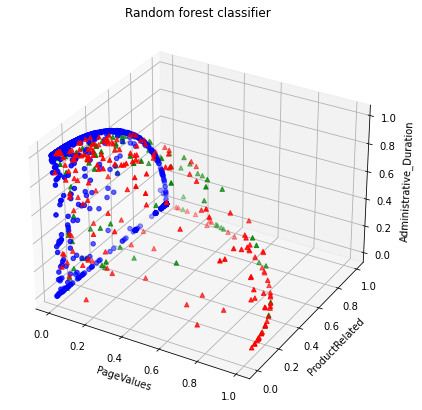

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate, train, and predict with the classifier
clf = RandomForestClassifier(max_depth=5, random_state=42, class_weight='balanced')
# Train the classifier
clf.fit(X_train, y_train)
predictionBR = clf.predict(X_test)
# Compute the confusion matrix and evaluation metrics
cm   = confusion_matrix(y_test,predictionBR)
acc   = accuracy(y_test,predictionBR)
rec   = recall(y_test,predictionBR)
prec  = precision(y_test,predictionBR)
f1    = f1_score(y_test,predictionBR)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)
visualize_scatter_plot(X_test, y_test, predictionBR, 'Random forest classifier')


In [31]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
              {"n_estimators":[1, 10, 100], "class_weight":[None, "balanced", "balanced_subsample"]}
]

rfc_clf = RandomForestClassifier(random_state=42)
grid_search_rfc = GridSearchCV(rfc_clf, param_grid, cv=5, scoring="f1", return_train_score=True)
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'class_weight': [None, 'balanced',
                                           'balanced_subsample'],
                          'n_estimators': [1, 10, 100]}],
             return_train_score=True, scoring='f1')

In [32]:
grid_search_rfc.best_estimator_

RandomForestClassifier(random_state=42)

Accuracy = 0.9387852702056433, Precision = 0.6735751295336787, Recall = 0.6666666666666666, F1-score = 0.6701030927835051
Confusion Matrix is:
[[1833   63]
 [  65  130]]


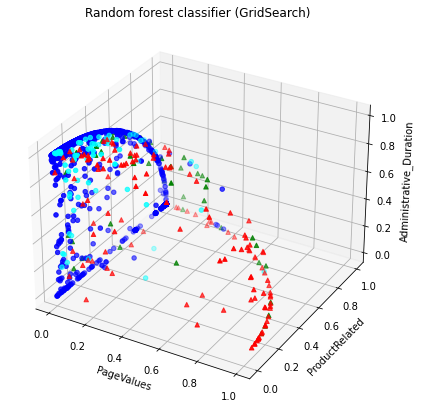

In [33]:
rfc_best = grid_search_rfc.best_estimator_
rfc_pred = rfc_best.predict(X_test)
# Compute the confusion matrix and evaluation metrics
cm   = confusion_matrix(y_test,rfc_pred)
acc   = accuracy(y_test,rfc_pred)
rec   = recall(y_test,rfc_pred)
prec  = precision(y_test,rfc_pred)
f1    = f1_score(y_test,rfc_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)
visualize_scatter_plot(X_test, y_test, rfc_pred, 'Random forest classifier (GridSearch)')

## Using AutoML

In [34]:
!pip install tpot

In [35]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=40, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/240 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8602181818181818

Generation 2 - Current best internal CV score: 0.8602181818181818

Generation 3 - Current best internal CV score: 0.8602181818181818

Generation 4 - Current best internal CV score: 0.860509090909091

Generation 5 - Current best internal CV score: 0.860509090909091

Best pipeline: XGBClassifier(RFE(MaxAbsScaler(LinearSVC(input_matrix, C=0.5, dual=True, loss=hinge, penalty=l2, tol=1e-05)), criterion=gini, max_features=0.9000000000000001, n_estimators=100, step=0.7500000000000001), learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0)


TPOTClassifier(generations=5, population_size=40, random_state=42, verbosity=2)

Accuracy = 0.945480631276901, Precision = 0.7262569832402235, Recall = 0.6666666666666666, F1-score = 0.695187165775401
Confusion Matrix is:
[[1847   49]
 [  65  130]]


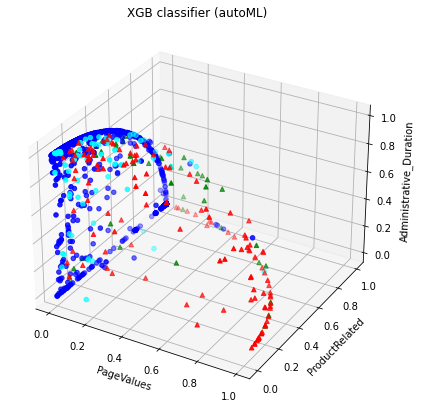

In [36]:
tpot_pred = tpot.predict(X_test)
# Compute the confusion matrix and evaluation metrics
cm   = confusion_matrix(y_test,tpot_pred)
acc   = accuracy(y_test,tpot_pred)
rec   = recall(y_test,tpot_pred)
prec  = precision(y_test,tpot_pred)
f1    = f1_score(y_test,tpot_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)
visualize_scatter_plot(X_test, y_test, tpot_pred, 'XGB classifier (autoML)')


## 2. We will generate user-bahavior clusters based on the purchasing behavior data for the complete dataset.
```
In this task, we are going to:
a. Quantify how many clusters and what are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. We will perform as detailed analysis of the clusters.
b.  Return plots and cluster images generated for the data.
c. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster. [E.g. which cluster represent New shoppers, vs brand conscious shoppers etc.]
```

### We will use all  dataset (Jan. - Dec.) that has been prepared earlier  

In [37]:
from utils import *

In [68]:
print(df_tsk1.shape)
df_tsk1.head()
df_tsk1.dtypes

(12330, 59)


Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
Month                             object
Region                             int64
Weekend                            int32
Revenue                            int32
SpecialDay_0                       uint8
SpecialDay_1                       uint8
OperatingSystems_1                 uint8
OperatingSystems_2                 uint8
OperatingSystems_3                 uint8
OperatingSystems_4                 uint8
OperatingSystems_5                 uint8
OperatingSystems_6                 uint8
OperatingSystems_7                 uint8
OperatingSystems_8                 uint8
Browser_1                          uint8
Browser_10      

Feature ranking:
1. feature 8 (0.304222)
2. feature 7 (0.095378)
3. feature 5 (0.091260)
4. feature 4 (0.087594)
5. feature 0 (0.066040)
6. feature 1 (0.065786)
7. feature 6 (0.062626)
8. feature 3 (0.036537)
9. feature 2 (0.035244)
10. feature 9 (0.019209)
11. feature 44 (0.010561)
12. feature 25 (0.010270)
13. feature 13 (0.006994)
14. feature 20 (0.006932)
15. feature 53 (0.006623)
16. feature 46 (0.006511)
17. feature 33 (0.006344)
18. feature 14 (0.006298)
19. feature 27 (0.006199)
20. feature 47 (0.005791)
21. feature 12 (0.005684)
22. feature 51 (0.005606)
23. feature 55 (0.005532)
24. feature 34 (0.005079)
25. feature 28 (0.004765)
26. feature 15 (0.004083)
27. feature 49 (0.003619)
28. feature 48 (0.003410)
29. feature 35 (0.003081)
30. feature 37 (0.003054)
31. feature 45 (0.002873)
32. feature 21 (0.002761)
33. feature 29 (0.002524)
34. feature 50 (0.001415)
35. feature 31 (0.001203)
36. feature 10 (0.001095)
37. feature 30 (0.001057)
38. feature 11 (0.000966)
39. feature 23

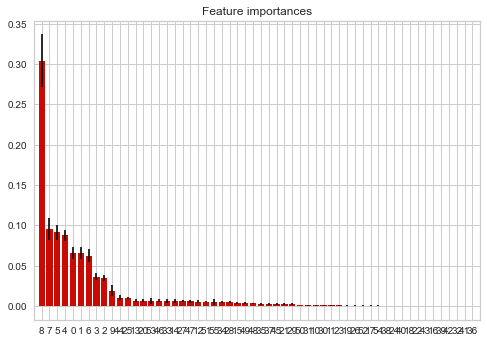

In [83]:
y = df_tsk1['Revenue'].values
df_tsk2=df_tsk1.drop(columns=['Revenue','Month','Region'])
X  = df_tsk2.values
indices, importances = return_feature_rank_from_RF(X,y)


### We are not going to use all the features but we will select only that > 0.025

In [86]:
# Extract the indices corresponding to a feature importance > 0.025
idx = np.where(importances > 0.025)
# Extract the names of the associated feature columns
selected_columns = df_tsk2.columns[idx]
print(idx)
print(selected_columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')


### Standardize features by removing the mean and scaling to unit variance.

In [123]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
#X_train_clr = scaler.fit_transform(X_train_clr)
#X_test_clr = scaler.transform(X_test_clr)

In [124]:
df_select = df_tsk2[selected_columns] 
X_train_clr = scaler.fit_transform(df_tsk2[selected_columns])
df_select_norm = pd.DataFrame(X_train_clr,columns=df_select.columns)   
y_train_clr = y
print(X_train_clr.shape)

(12330, 9)


In [125]:
df_select_norm.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.085747,0.023779,0.020982,0.013522,0.045009,0.018676,0.110957,0.215364,0.016279
std,0.123029,0.052013,0.052923,0.055209,0.063086,0.029913,0.242442,0.242983,0.051328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002878,0.000000,0.071429,0.000000
50%,0.037037,0.002207,0.000000,0.000000,0.025532,0.009362,0.015562,0.125782,0.000000
75%,0.148148,0.027438,0.000000,0.000000,0.053901,0.022887,0.084063,0.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### First, we will try using PCA to reduce dimension

In [167]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_clr)
print(X_train_pca.shape)

(12330, 3)


### Using the elbow method to determine the optimal number of clusters for k-means clustering

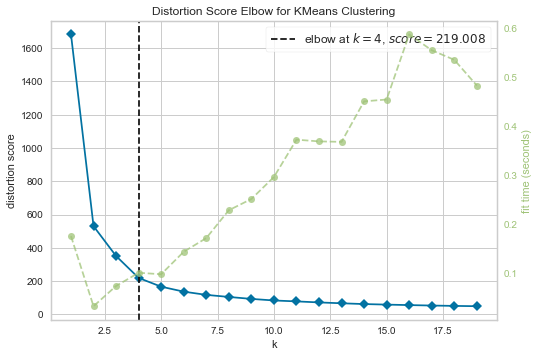

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [168]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
kmn_model = KMeans()
visualizer = KElbowVisualizer(kmn_model, k=(1,20))
# Fit the visualizer to the reduced features data
visualizer.fit(X_train_pca)
visualizer.show() 

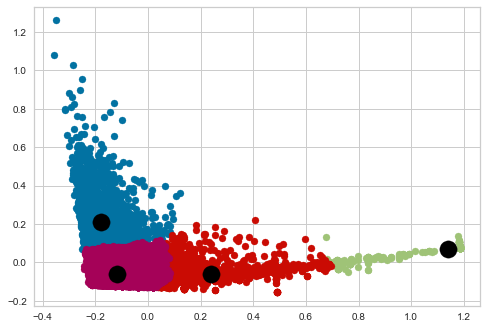

In [172]:
# Instantiate the clustering
kmn_model  = KMeans(n_clusters=4, random_state=42)
out_km = kmn_model.fit_predict(X_train_pca)
for i in range(5):
  plt.scatter(X_train_pca[out_km == i, 0], X_train_pca[out_km == i, 1])
plt.scatter(kmn_model.cluster_centers_[:, 0], kmn_model.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
unique_values = np.unique(out_km)

Look good but does tSNE gives better result?

### We then try tSNE 

In [129]:
# Apply TSNE
import sklearn.manifold
tsne_model = sklearn.manifold.TSNE(n_components=3, perplexity=2)
X_train_tsne = tsne_model.fit_transform(X_train_clr)

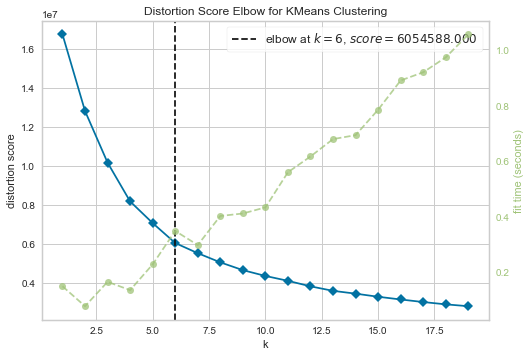

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [130]:
# Instantiate the clustering model and visualizer
kmn_model = KMeans()
visualizer = KElbowVisualizer(kmn_model, k=(1,20))
# Fit the visualizer to the reduced features data
visualizer.fit(X_train_tsne)        
visualizer.show() 

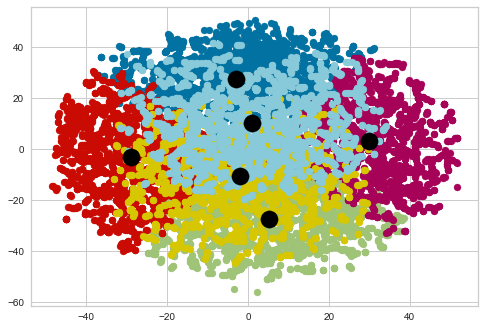

In [166]:
# Instantiate the clustering
kmn_model  = KMeans(n_clusters=6, random_state=42)
out_km2 = kmn_model.fit_predict(X_train_tsne)
for i in range(6):
  plt.scatter(X_train_tsne[out_km2 == i, 0], X_train_tsne[out_km2 == i, 1])
plt.scatter(kmn_model.cluster_centers_[:, 0], kmn_model.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
unique_values2 = np.unique(out_km2)

In [183]:
df_clr = df_select.copy()
df_clr['Revenue'] = df_tsk1['Revenue']
df_clr['Month'] = df_tsk1['Month'].replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
df_clr['VisitorType'] = df['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[1,2,3])
df_clr["ClusterID"] = out_km
df_clr.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,Month,VisitorType,ClusterID
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,1,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,2,1,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,2,1,3


### Look at purchase/revenue percentage of clusters

In [184]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
revenue_percentage = np.zeros(len(unique_values))
representation_percentage =np.zeros(len(unique_values))
# Loop through the clusters
for index, item in enumerate(unique_values):
    locations = df_clr[df_clr['ClusterID']== item]
    revenue = locations[locations['Revenue'] == 1 ]
    representation_percentage[index] = locations.shape[0]/df_clr.shape[0]
    revenue_percentage[index] = revenue.shape[0]/df_clr.shape[0]


Representation Percentage= [0.186618   0.06528792 0.12822384 0.61987024]
Revenue Percentage= [0.04647202 0.00024331 0.00389294 0.10413625]


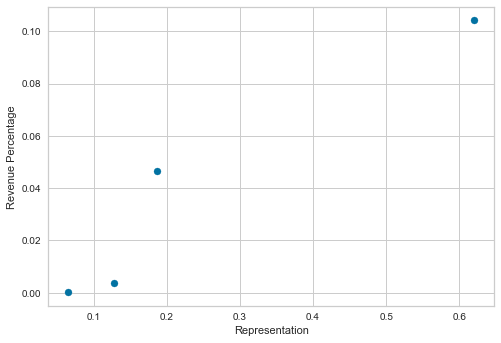

In [185]:
print('Representation Percentage=',(representation_percentage))
print('Revenue Percentage=',revenue_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,revenue_percentage)
plt.xlabel('Representation')
plt.ylabel('Revenue Percentage')
plt.show()

In [187]:
total_revenue=df_clr.loc[df_clr['Revenue']==1]
pct_revenue=total_revenue.shape[0]/df_clr.shape[0]
print('Percetage revenue from total is ' + str(round(pct_revenue*100,2)) +'%')

Percetage revenue from total is 15.47%


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py3

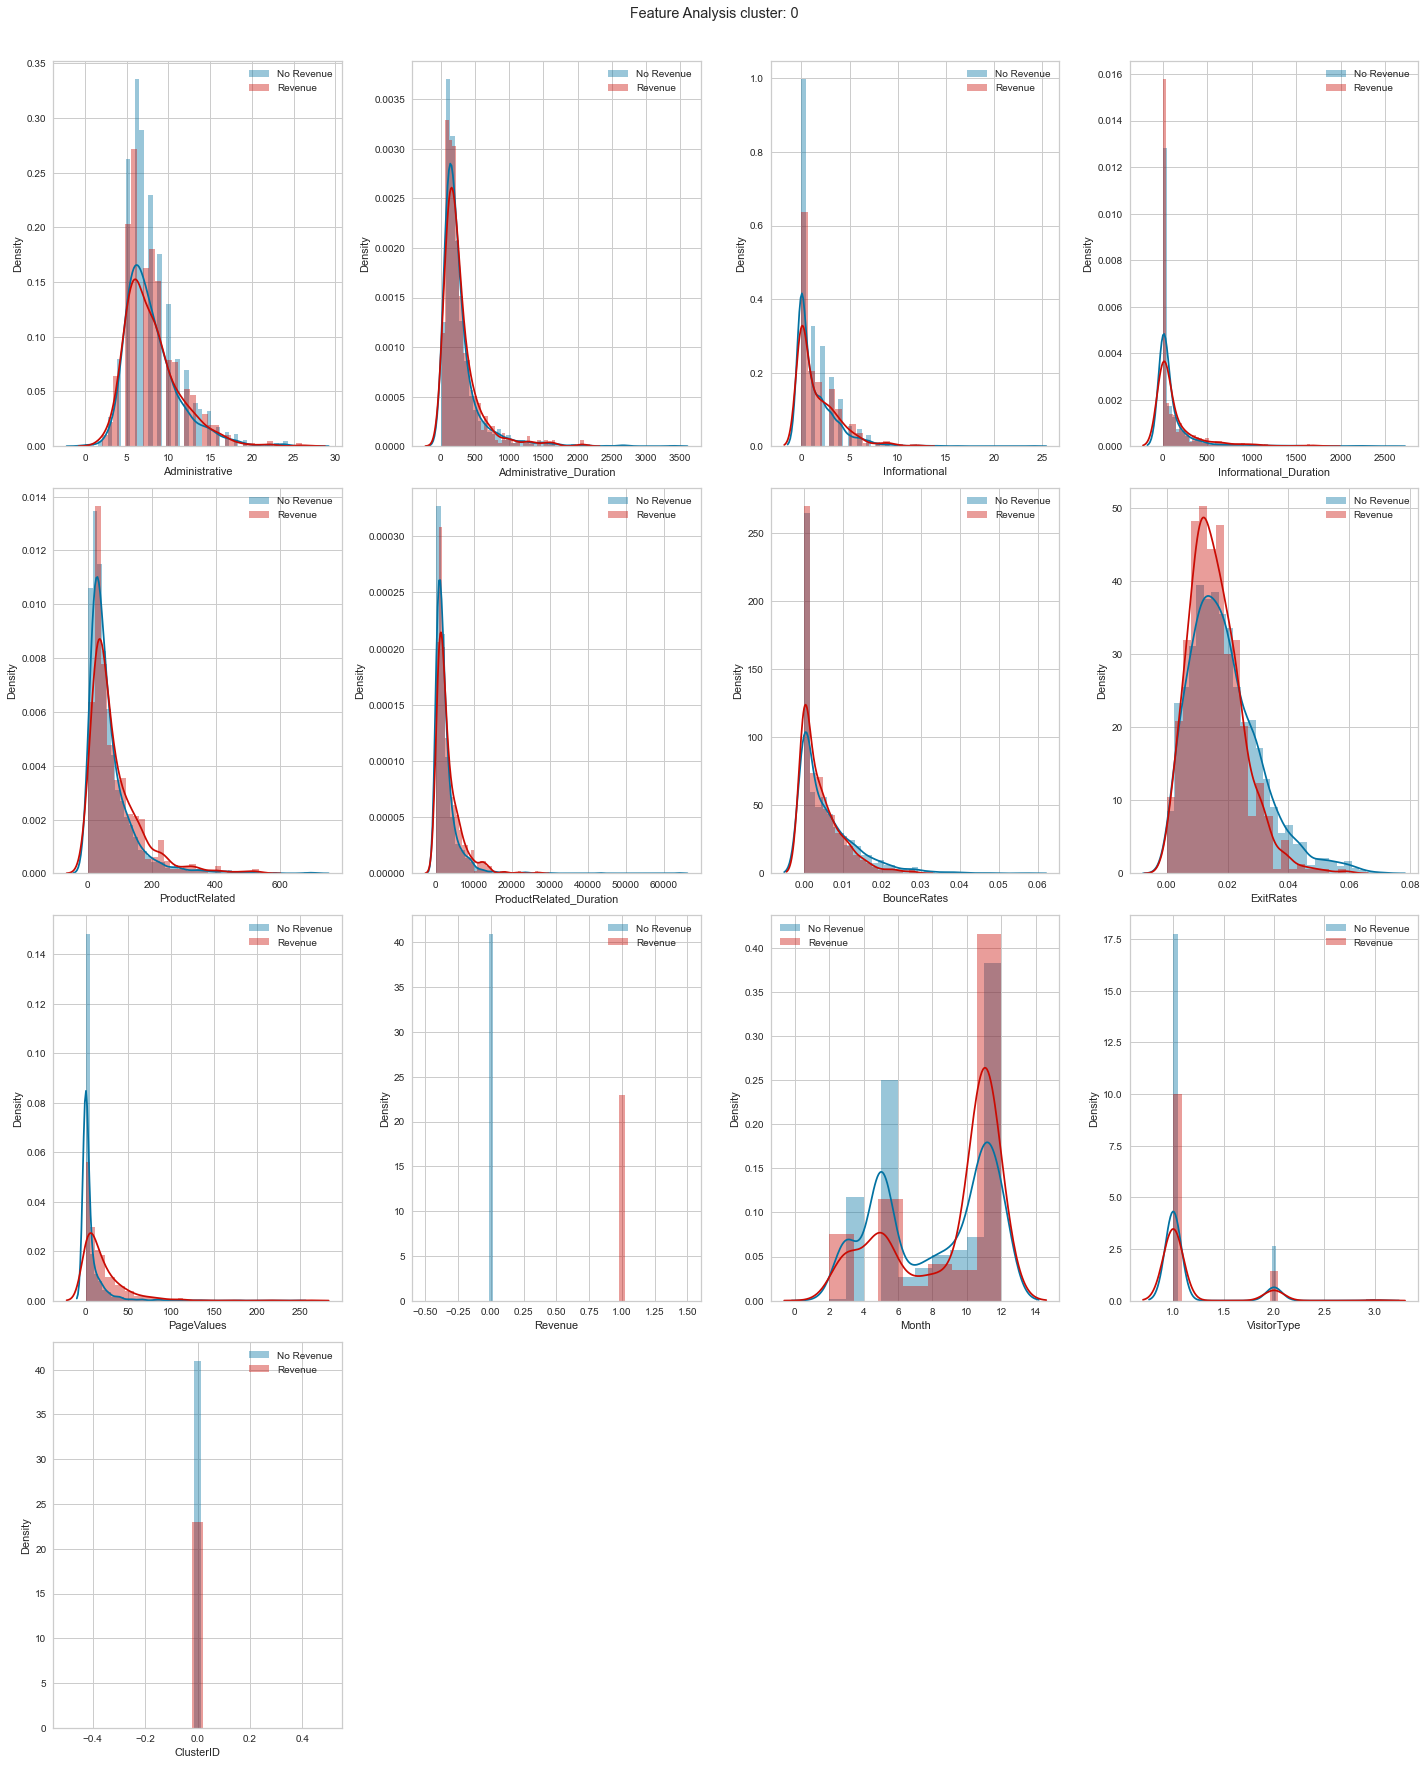

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

no revenue!
no revenue!


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\adi\anaconda3\envs\ml_py3

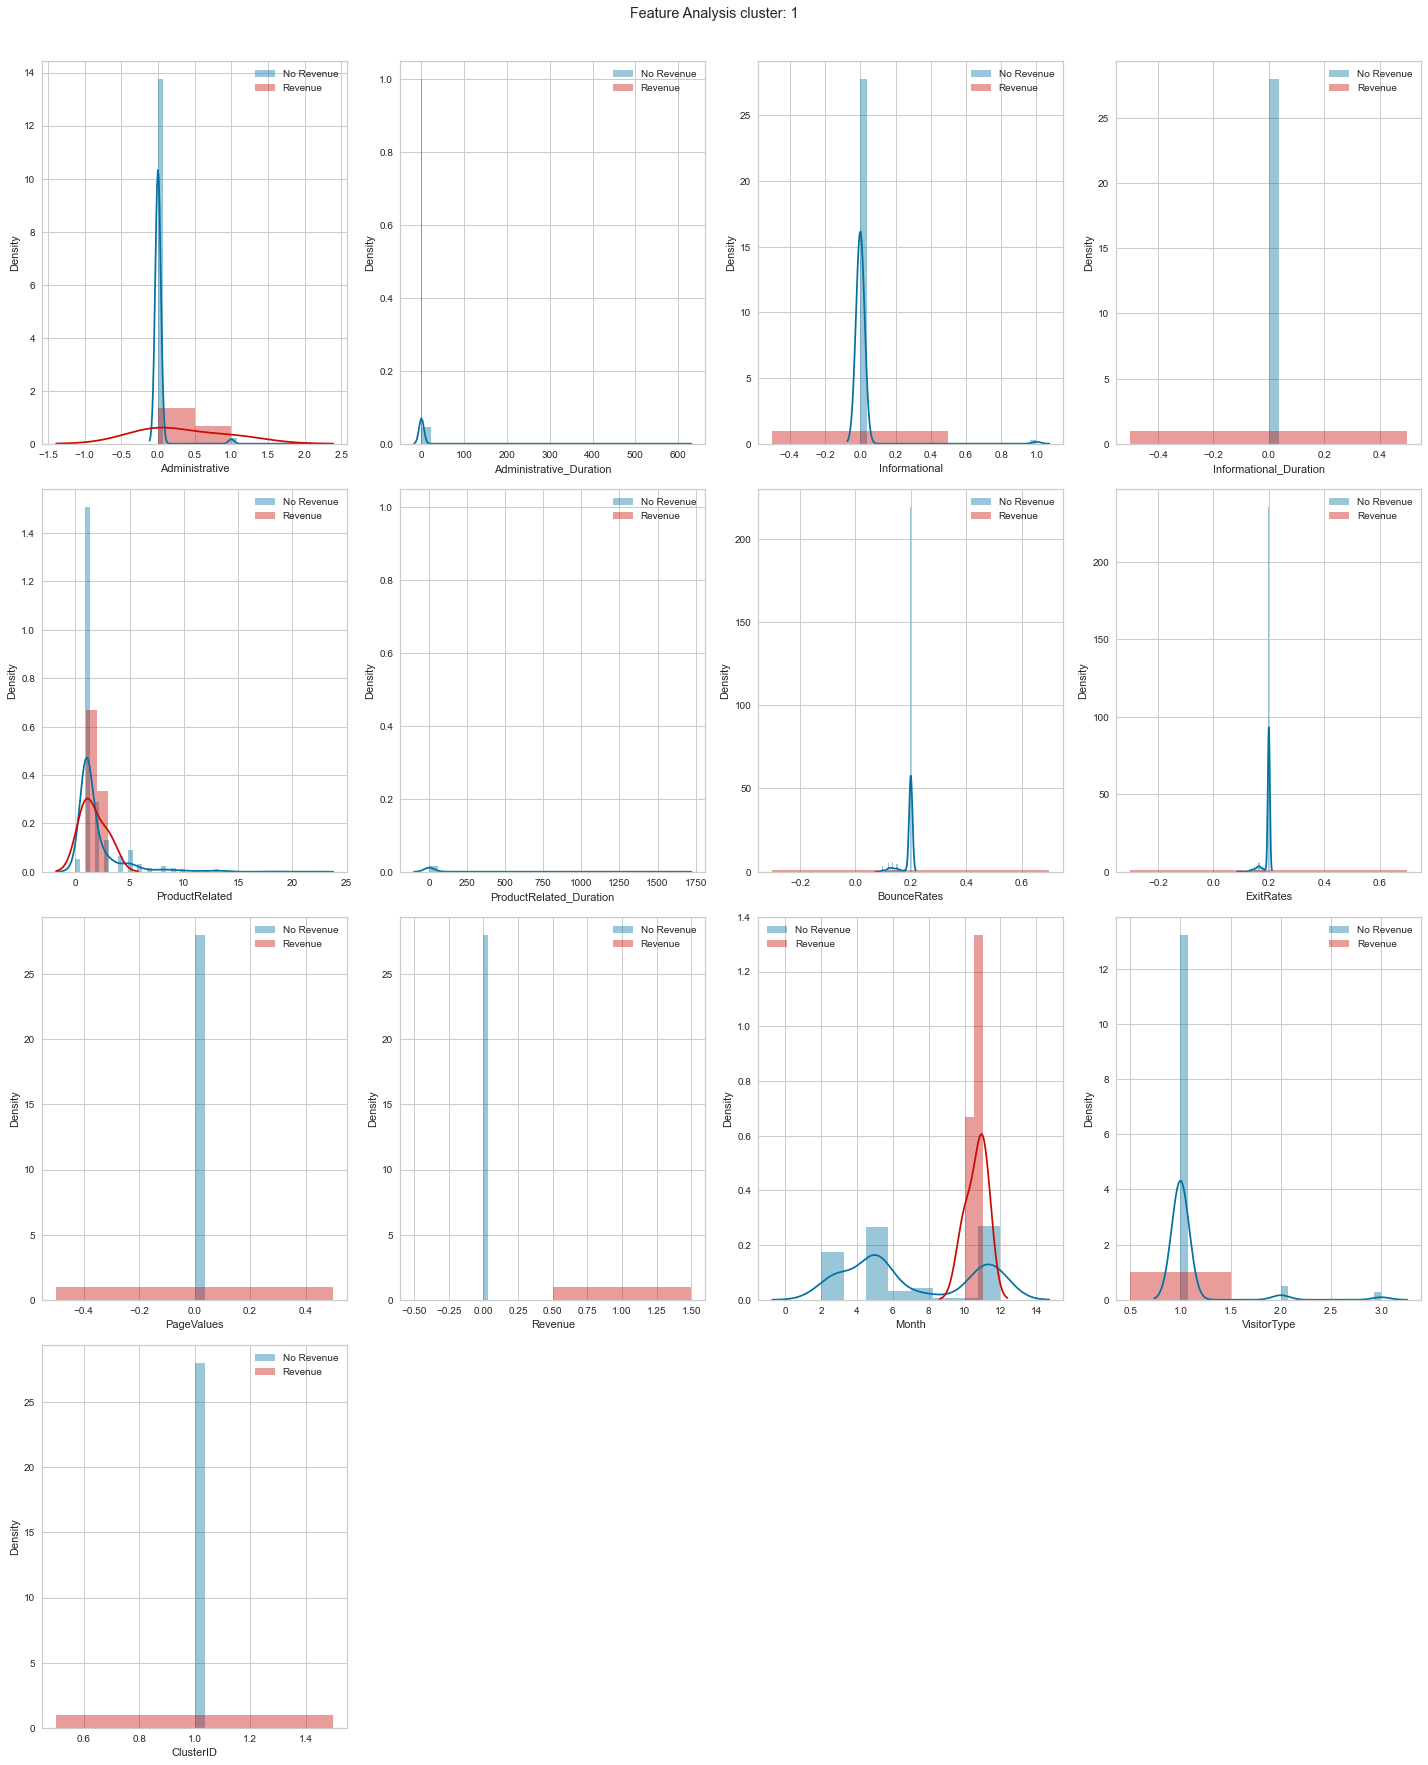

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

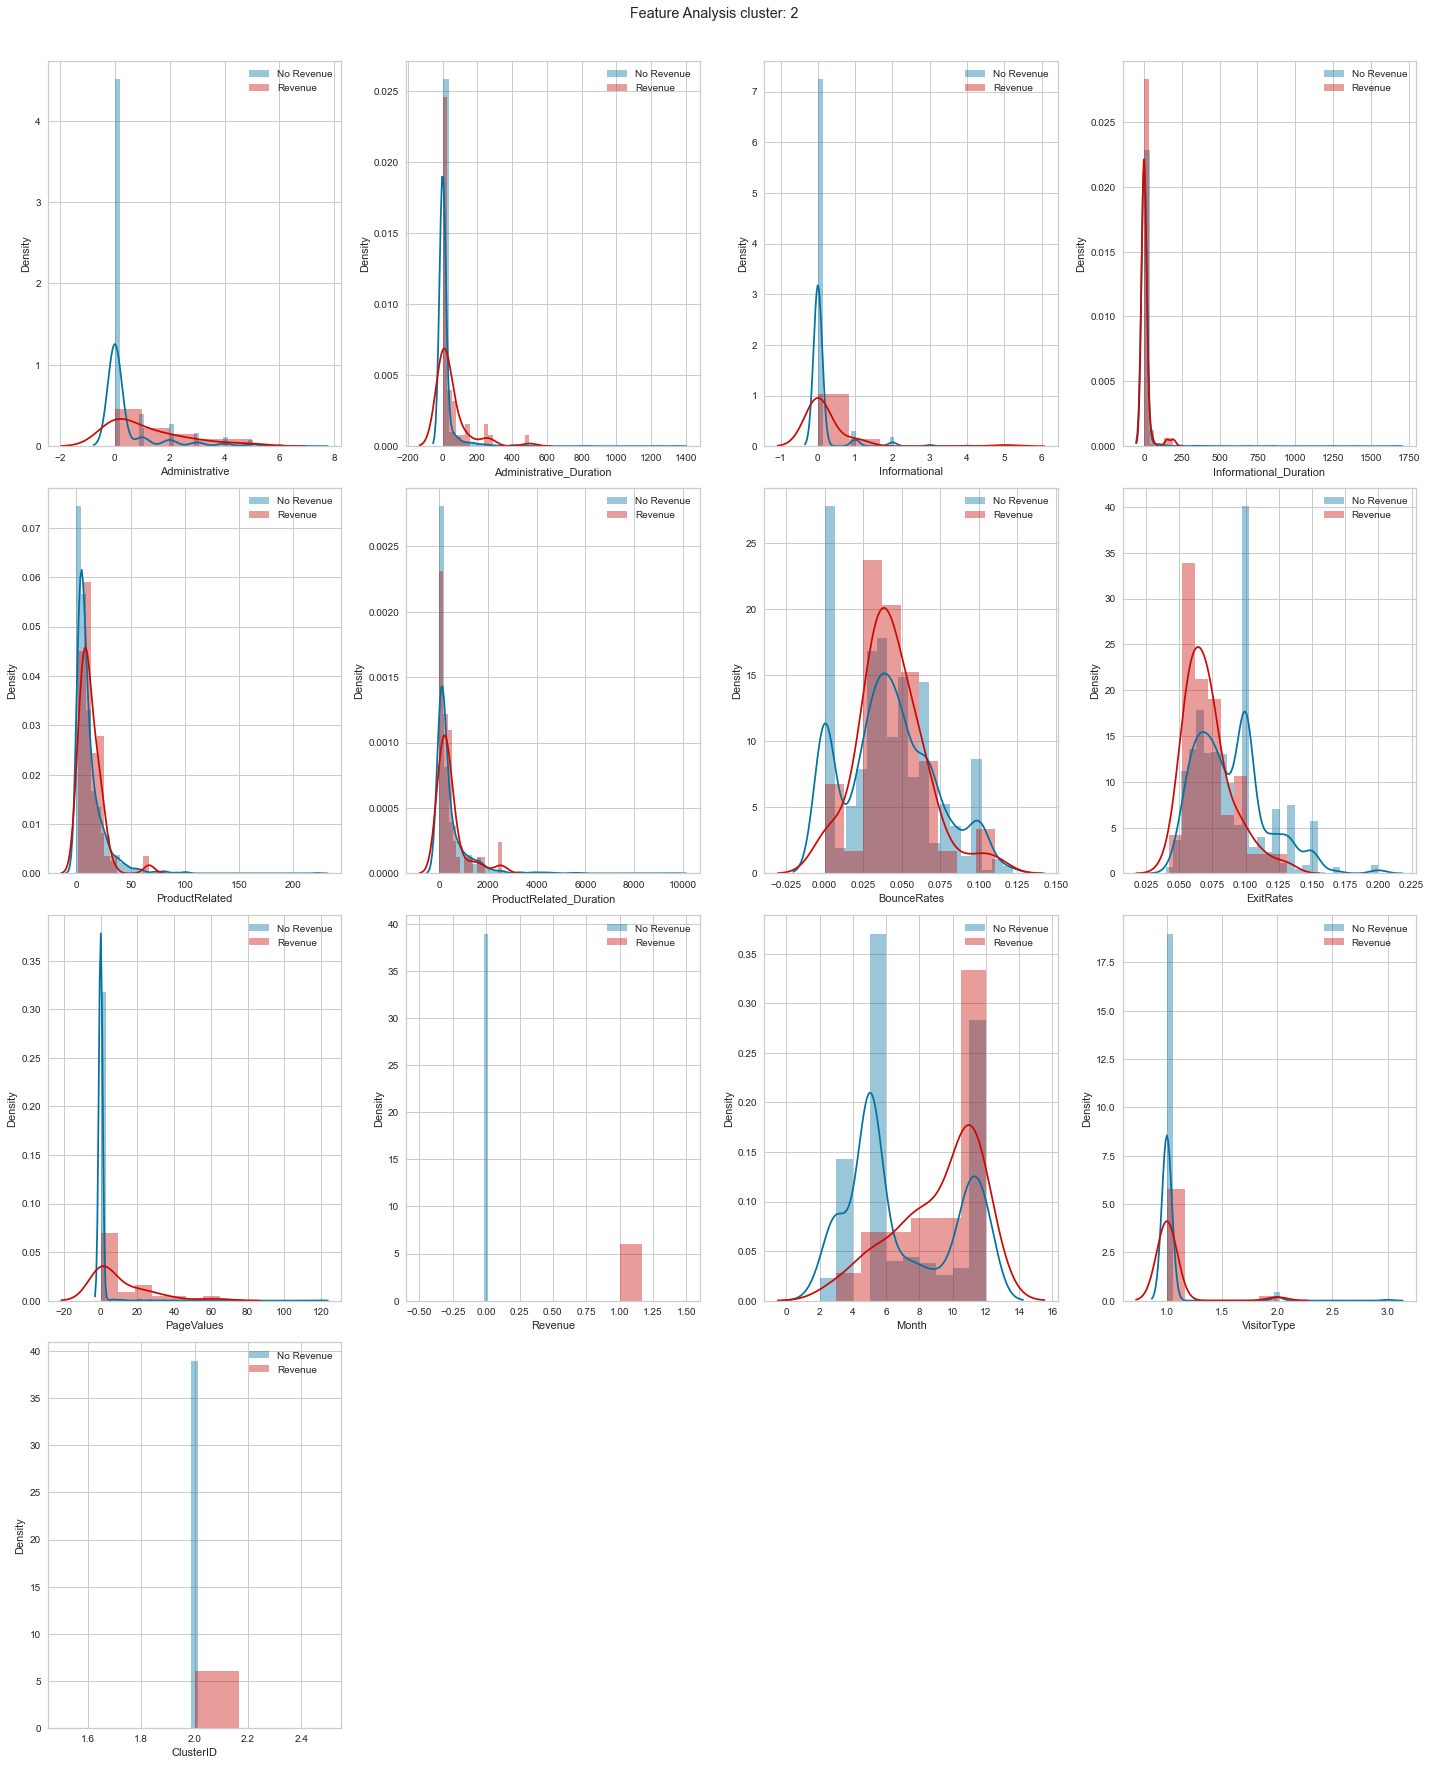

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\adi\anaconda3\envs\ml_py3

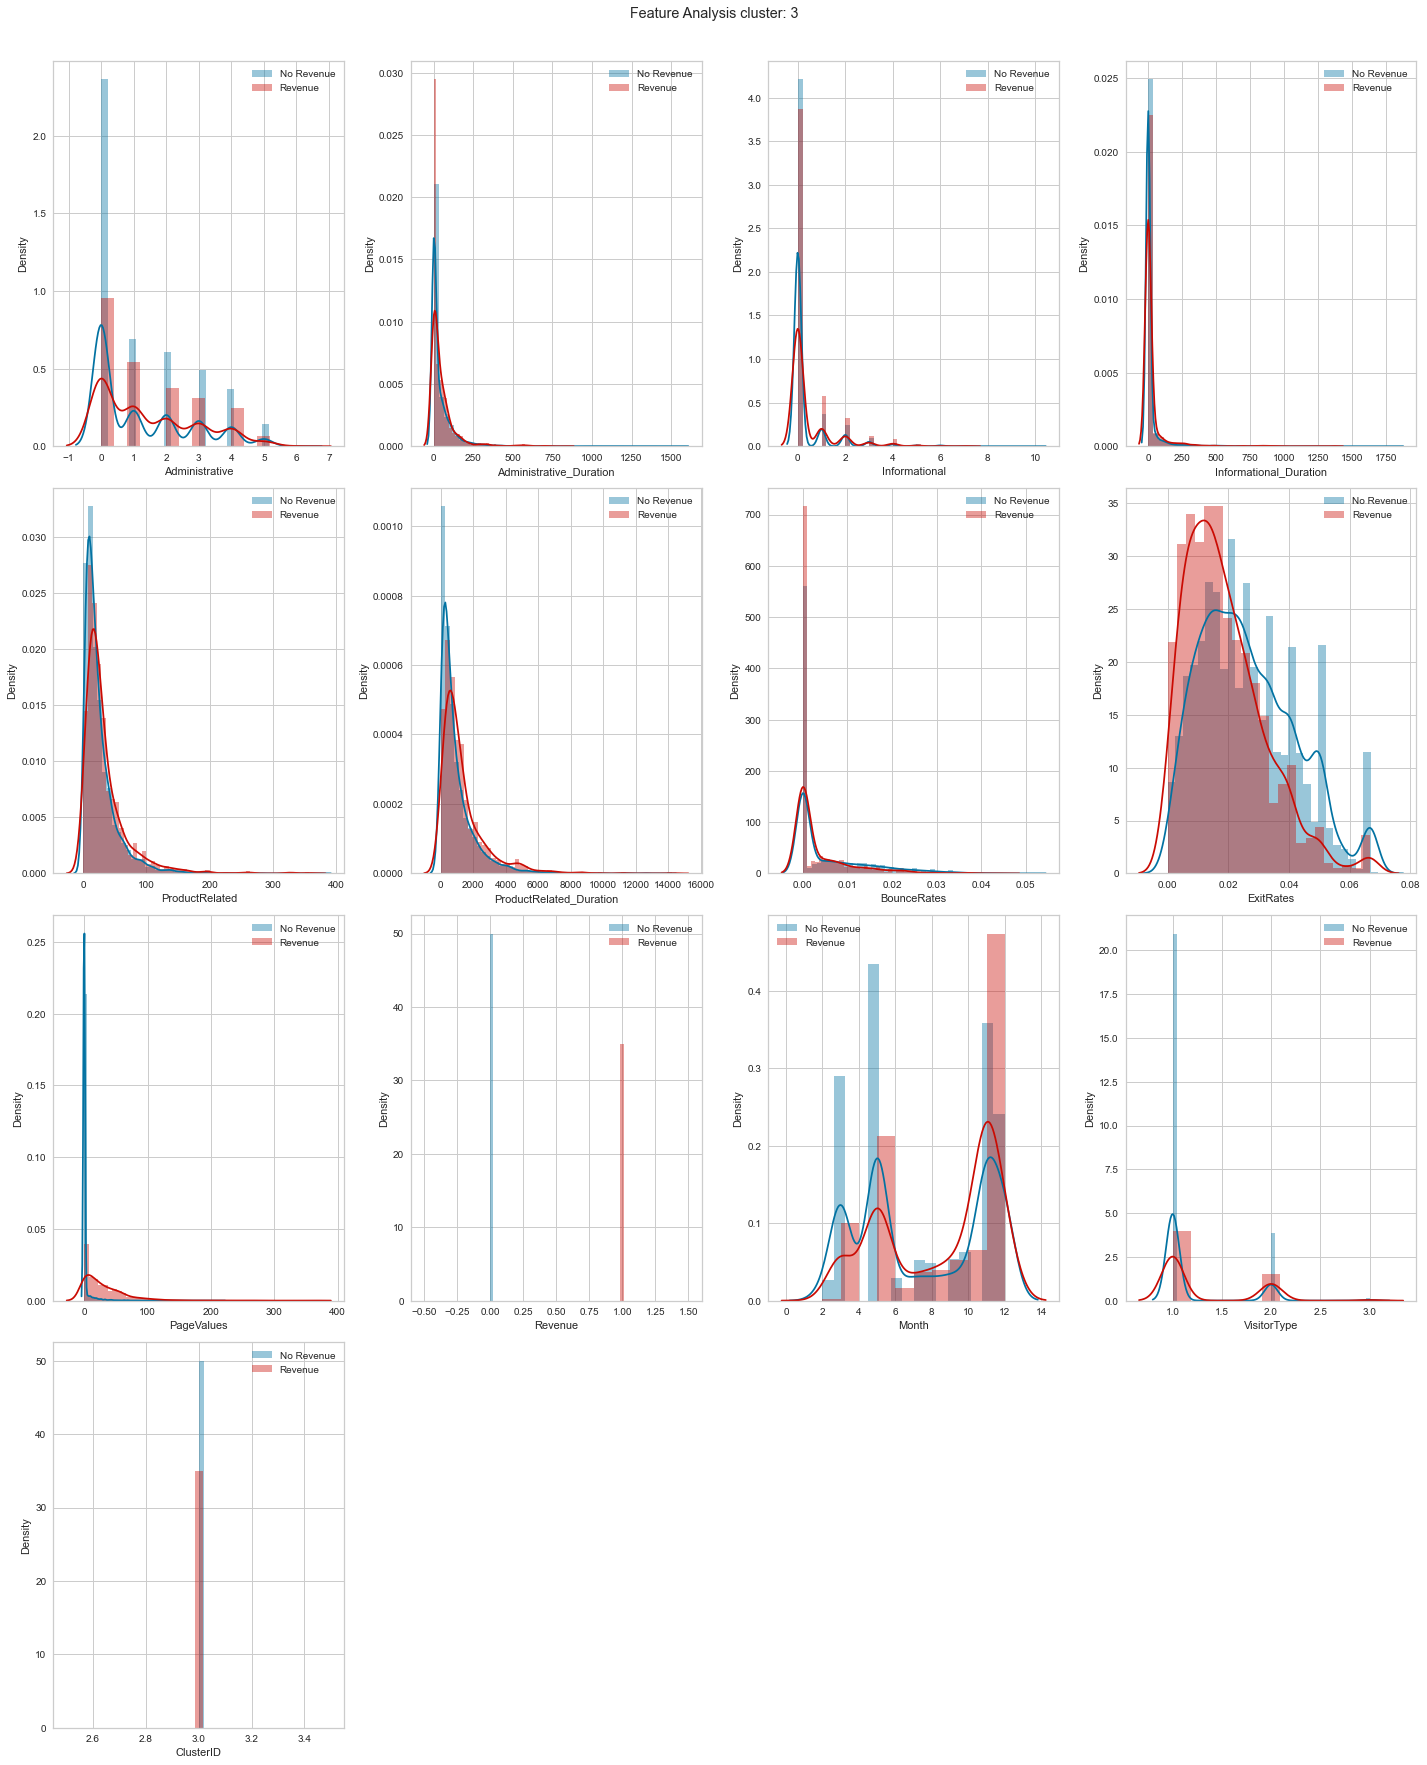

In [189]:
import seaborn as sb
# Next, to analyze composition of each cluster
#Cluster 
for ii in range(0,4):
    result = df_clr.loc[df_clr['ClusterID'] == ii]

    fig = plt.figure(figsize = (20, 25))
    j = 0
    for i,item in enumerate(result.columns): 
        plt.subplot(4, 4, j+1)
        j += 1
    #     if(i==12):
    #          sb.countplot(x='weekday', hue='Purchase', data=result)
    #     elif(i==13):
    #          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
    #     else:
    #         item=None
        sb.distplot(result[item][result['Revenue']==0], color='b', label = 'No Revenue')
        try:
         sb.distplot(result[item][result['Revenue']==1], color='r', label = 'Revenue')
        except:
         print('no revenue!')
        plt.legend(loc='best')
        
    fig.suptitle('Feature Analysis cluster: '  + str(ii))
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()


## 3. We will consider having training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. We will build a semi-supervised self labelling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit our classifier. 

### We will report classification performance on Feb-March data set with and without the self-labelled data.

```
a. We will consider the records from Oct-Dec and generate the classification performance on Test data
b. After using the self labelled data and training data together, does the classification performance on 
Test data improve?
```

In [57]:
#Get from the earlier EDA

df_tsk1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,Feb,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,Feb,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,Feb,...,0,1,0,0,0,0,0,0,0,1


## label y_train by -1 only for Oct, Nov, and Dec months

In [58]:
# Split train and test data
# for train data
options = ['June','Jul','Aug','Sep']  
# selecting rows based on condition
X_train1 = df_tsk1[df_tsk1['Month'].isin(options)]
y_train1 = X_train1['Revenue']
X_train1 = X_train1[selected_columns_fnl] 
print(X_train1.shape)

# for train data
options = ['Oct','Nov','Dec']  
# selecting rows based on condition
X_train2 = df_tsk1[df_tsk1['Month'].isin(options)]
y_train2 = np.ones((X_train2['Revenue'].shape[0],)) * -1.0
X_train2 = X_train2[selected_columns_fnl] 
print(y_train2.shape)

# for test data
options = ['Feb','Mar']  
# selecting rows based on condition
X_test = df_tsk1[df_tsk1['Month'].isin(options)]
y_test = X_test['Revenue']
X_test = X_test[selected_columns_fnl] 

X = np.concatenate((X_train1,X_train2,X_test),axis=0)
y = np.concatenate((y_train1,y_train2,y_test),axis=0)
print(X.shape)
print(y.shape)

(1601, 9)
(5274,)
(8966, 9)
(8966,)


In [59]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import recall_score
neighbors = [2, 3, 5, 7, 9, 11]
best_recall_score = 0.0
params = dict()

for neighbor in neighbors:
    lp_model = LabelSpreading(kernel='knn', alpha=0.01, n_neighbors=neighbor)
    lp_model.fit(X, y)
    y_pred = lp_model.predict(X)
    #y_pred = lp_model.transduction_
    n_recall_score = recall_score(y, y_pred, average='weighted')
    if n_recall_score > best_recall_score:
        best_recall_score = n_recall_score
        params = lp_model.get_params()
    print(n_recall_score)

print(f"best_recall: {best_recall_score:.4f}, best n_neighbors: {params['n_neighbors']}")

C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.39304037474905196


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.3957171536917243


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.39058666071826903


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.38824447914343074


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.3845639080972563
0.3828909212580861
best_recall: 0.3957, best n_neighbors: 3


C:\Users\adi\anaconda3\envs\ml_py37\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [60]:
from sklearn.semi_supervised import LabelSpreading
lp_model = LabelSpreading(kernel='knn', n_neighbors=3, alpha=0.01)
lp_model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn', n_neighbors=3)

## Evaluate the labeling prediction

In [61]:
# Evaluate the labeling prediction
# Create an ordered array of indices of the training data
train_indices = np.arange(len(y))
# Define the training data indices after n_labeled_points as unlabeled
bgn_idx = y_train1.shape[0]+y_train2.shape[0]
pred_set = train_indices[bgn_idx:]

semi_sup_preds = lp_model.transduction_[pred_set]

# Do metrics evaluation
cm   = confusion_matrix(y_test, semi_sup_preds, labels=lp_model.classes_)
acc  = accuracy(y_test, semi_sup_preds)
rec  = recall(y_test, semi_sup_preds)
prec = precision(y_test, semi_sup_preds)
f1   = f1_score(y_test, semi_sup_preds)
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 1.0, Precision = 1.0, Recall = 1.0, F1-score = 1.0
Confusion Matrix is:
[[1896    0]
 [   0  195]]


## Get the results  for Oct, Nov, Dec, and fill the y

In [62]:
# Get the results  for Oct, Nov, Dec, and fill the y
bgn_idx = y_train1.shape[0]
end_idx = y.shape[0]-y_test.shape[0]
unlabeled_set = train_indices[bgn_idx:end_idx]

semi_sup_preds = lp_model.transduction_[unlabeled_set]
print(semi_sup_preds.shape)

y_all = np.concatenate((y_train1,semi_sup_preds,y_test),axis=0)
print(y_all.shape)

(5274,)
(8966,)


In [63]:
X_train = np.concatenate((X_train1,X_train2),axis=0)
y_train = np.concatenate((y_train1,semi_sup_preds),axis=0)

In [66]:
# Instantiate, train, and predict with the classifier
clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight='balanced')
# Train the classifier
clf.fit(X_train, y_train)
predictionBR = clf.predict(X_test)
# Compute the confusion matrix and evaluation metrics
cm   = confusion_matrix(y_test,predictionBR)
acc   = accuracy(y_test,predictionBR)
rec   = recall(y_test,predictionBR)
prec  = precision(y_test,predictionBR)
f1    = f1_score(y_test,predictionBR)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 0.9603060736489718, Precision = 0.7043795620437956, Recall = 0.9897435897435898, F1-score = 0.8230277185501066
Confusion Matrix is:
[[1815   81]
 [   2  193]]


### The result was improved after using the self labelled data and training data together